# Bike Sharing Dataset Information

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

### Attribute Information:

#### Both bikehour.csv and day.csv have the following fields, except hour which is not available in day.csv

* instant: record index
* dteday : date
* season : season (1:winter, 2:spring, 3:summer, 4:fall)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from [Web Link])
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


### Loading the dataset

In [2]:
df = pd.read_csv('bikehour.csv')
df.shape

(17379, 17)

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# statistical informtion
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
# datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# unique values
df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

# Data Preprocessing 

In [7]:
# check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
## data feature names will not clearly understandig so we will rename the colum names to understanding way
df = df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'
    })
df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
df = df.drop(columns=['instant', 'dteday', 'year'])

In [10]:
df.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
# change int columns to category
cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


In [12]:
df.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Exploratory Data Analysis

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

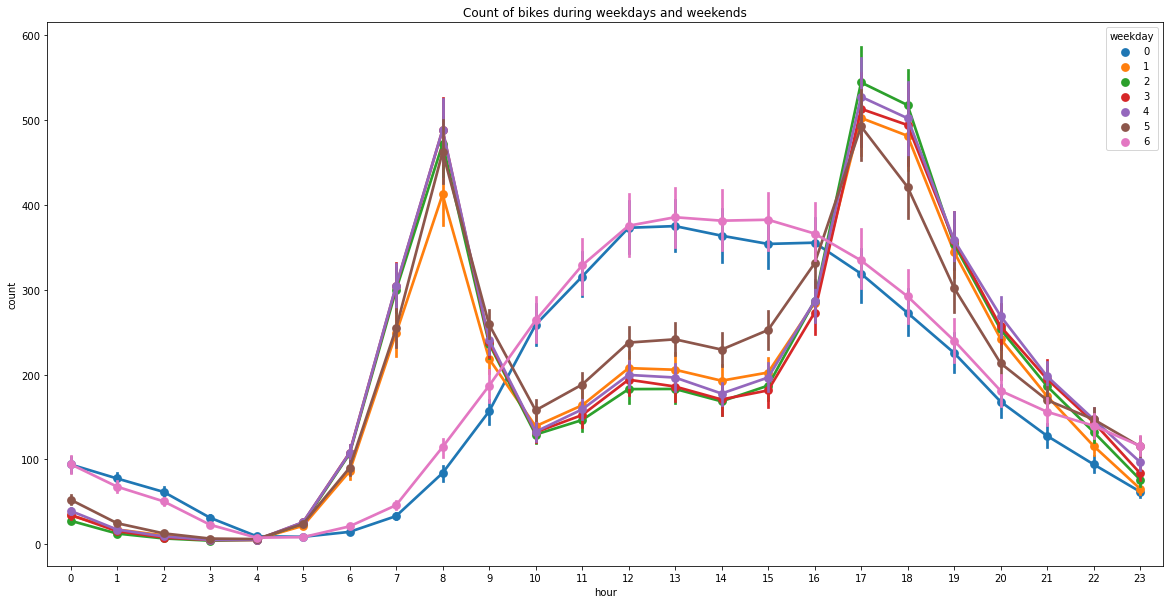

In [13]:
## Count of bikes during weekdays and weekends
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

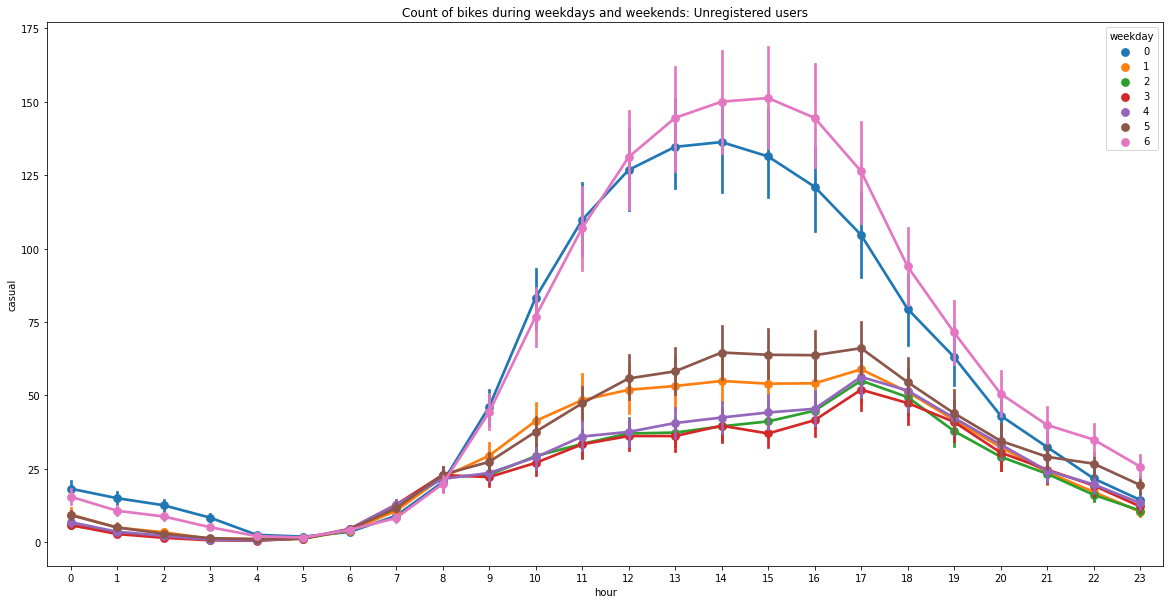

In [14]:
## Count of bikes during weekdays and weekends: Unregistered users
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

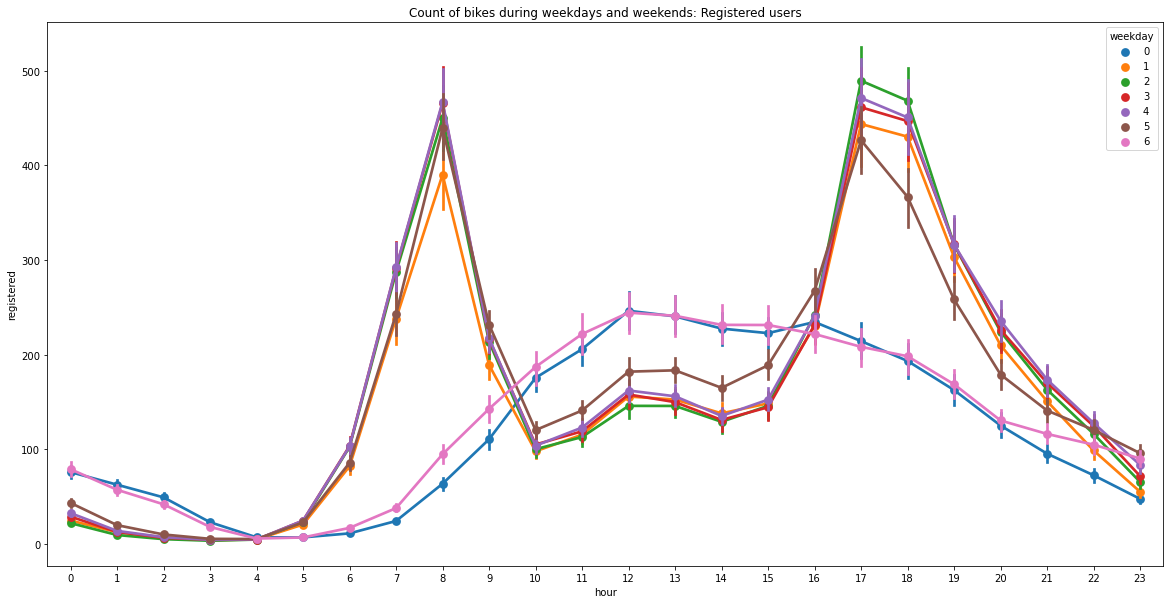

In [15]:
## Count of bikes during weekdays and weekends: Registered users
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

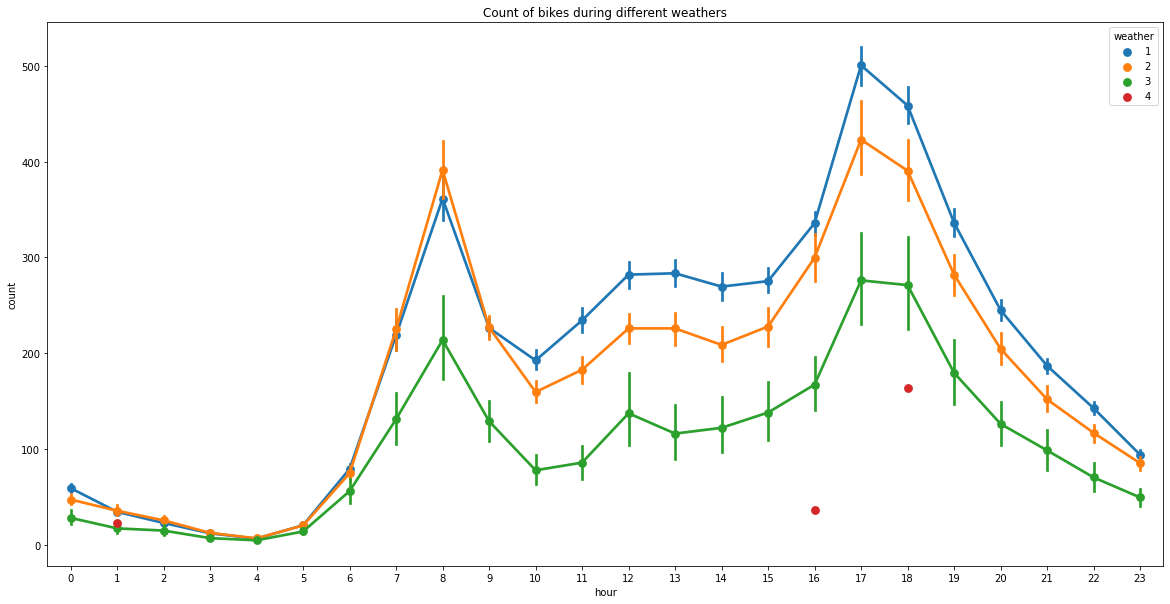

In [16]:
## Count of bikes during different weathers
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Count of bikes during different weathers')

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

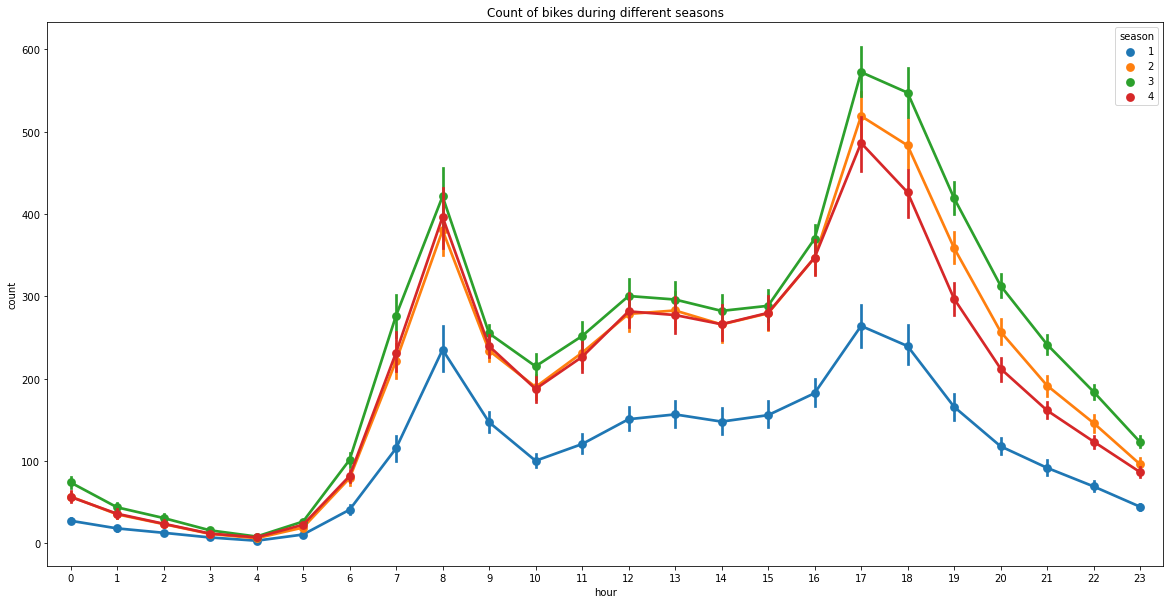

In [17]:
## Count of bikes during different seasons
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

[Text(0.5, 1.0, 'Count of bikes during different months')]

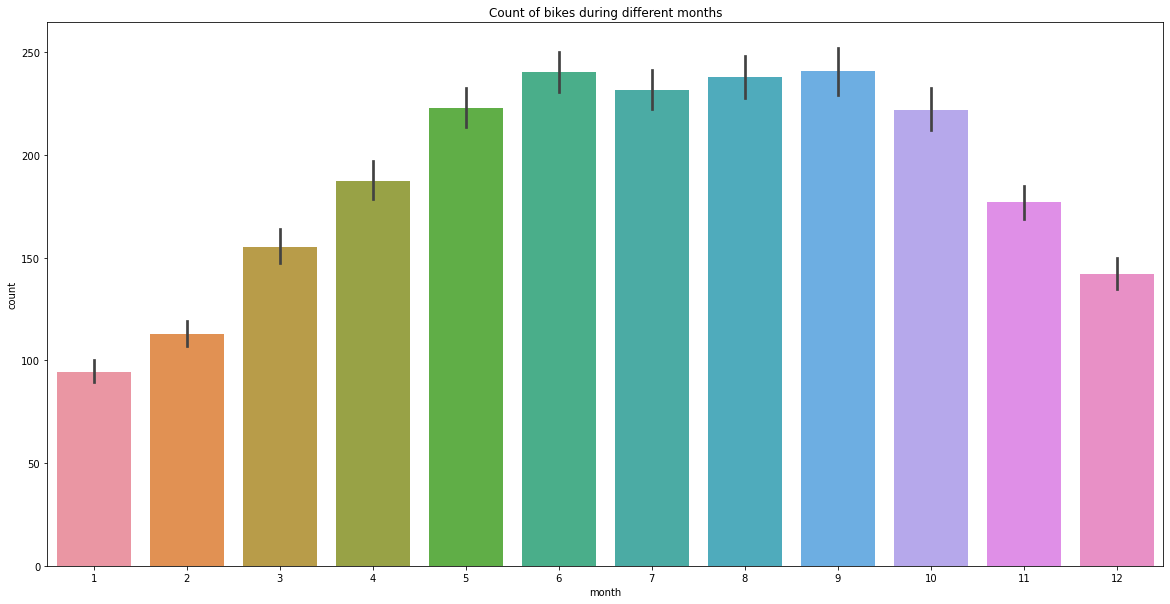

In [18]:
## Count of bikes during different months in Year
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different days')]

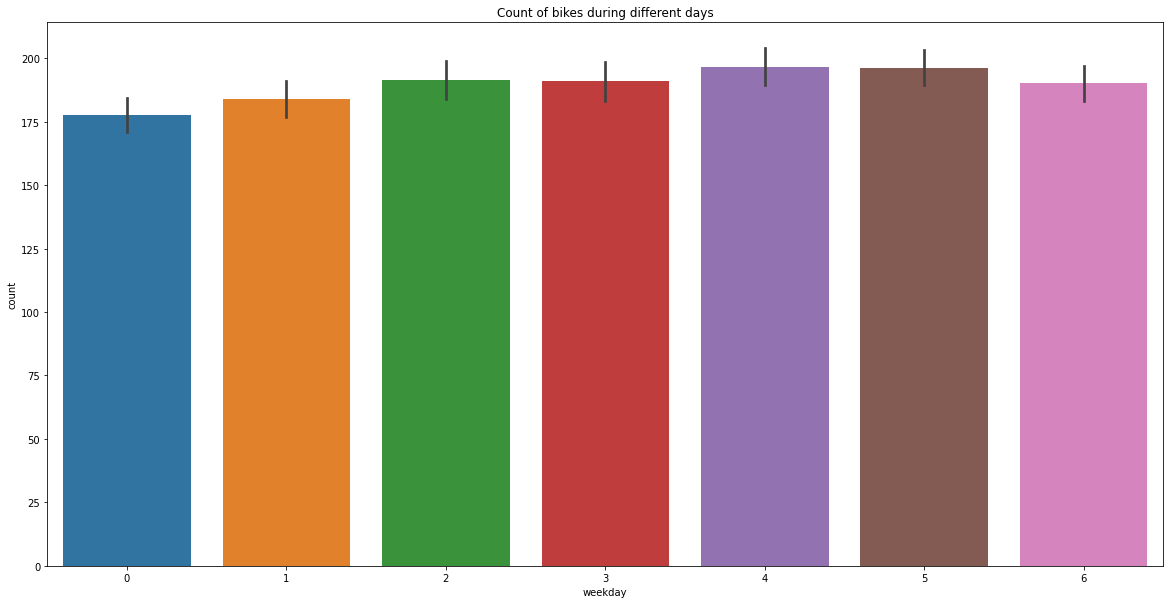

In [19]:
## Count of bikes during different days in Week
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='weekday', y='count', ax=ax)
ax.set(title='Count of bikes during different days')

[Text(0.5, 1.0, 'Relation between humidity and users')]

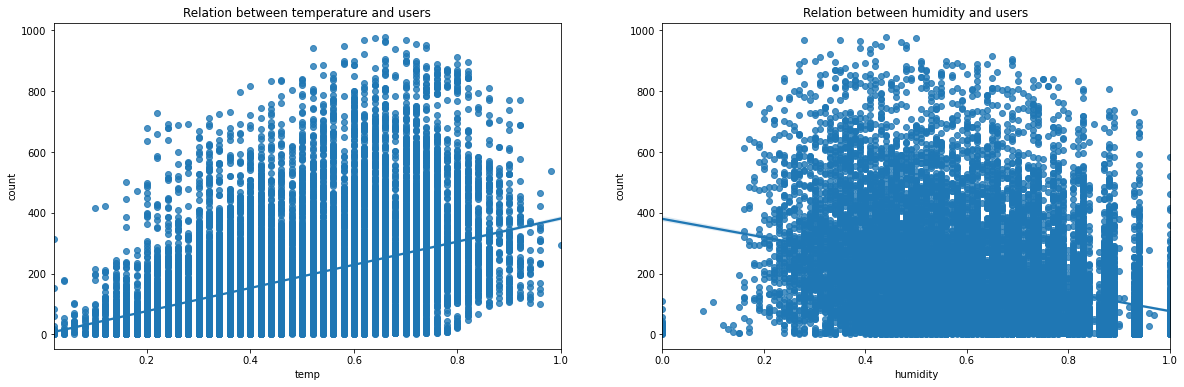

In [20]:
## Relation between temperature and users
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['temp'], y=df['count'], ax=ax1)
ax1.set(title="Relation between temperature and users")

## Relation between humidity and users
sns.regplot(x=df['humidity'], y=df['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

In [21]:
# Scaling the count labels
df['count'] = np.log(df['count'])

[Text(0.5, 1.0, 'Theoritical quantiles')]

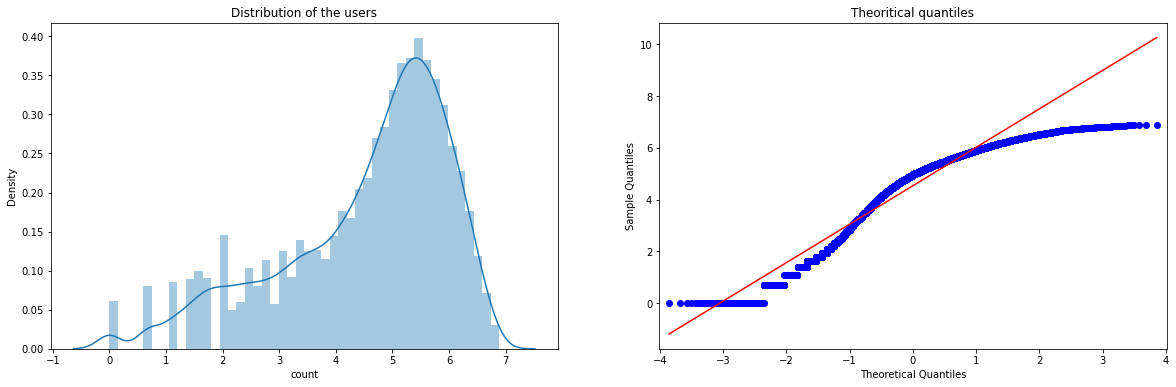

In [22]:
## Distribution of the users show in plot
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

In [23]:
df

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,2.772589
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,3.688879
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,3.465736
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,2.564949
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,4.779123
17375,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,4.488636
17376,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,4.499810
17377,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,4.110874


## Coorelation Matrix

<AxesSubplot:>

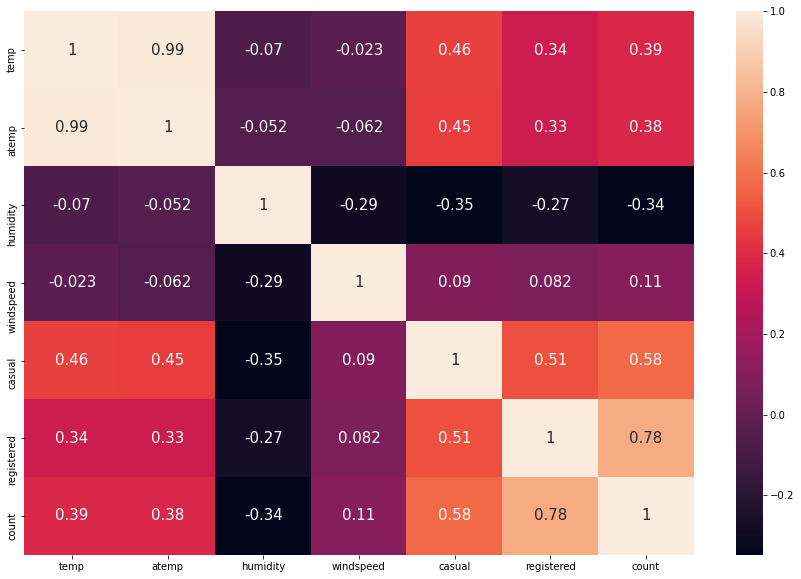

In [24]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

In [25]:
df.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,2.772589
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,3.688879
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,3.465736
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,2.564949
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,0.000000


#### One Hot Encoding The CHanged Categorical Features int One Hot Encoding

In [26]:
df_oh = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    df_oh = one_hot_encoding(df_oh, col)
df_oh.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,2.772589,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,3.688879,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,3.465736,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,2.564949,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,0.000000,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
df_oh.isna().sum()

temp            0
atemp           0
humidity        0
windspeed       0
casual          0
registered      0
count           0
season_2        0
season_3        0
season_4        0
month_2         0
month_3         0
month_4         0
month_5         0
month_6         0
month_7         0
month_8         0
month_9         0
month_10        0
month_11        0
month_12        0
hour_1          0
hour_2          0
hour_3          0
hour_4          0
hour_5          0
hour_6          0
hour_7          0
hour_8          0
hour_9          0
hour_10         0
hour_11         0
hour_12         0
hour_13         0
hour_14         0
hour_15         0
hour_16         0
hour_17         0
hour_18         0
hour_19         0
hour_20         0
hour_21         0
hour_22         0
hour_23         0
holiday_1       0
weekday_1       0
weekday_2       0
weekday_3       0
weekday_4       0
weekday_5       0
weekday_6       0
workingday_1    0
weather_2       0
weather_3       0
weather_4       0
dtype: int

In [28]:
## we will splittint the data (input split)
X = df_oh.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count'], axis=1)
y = df_oh['count']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

# models = [LinearRegression(),
#          Ridge(),
#          HuberRegressor(),
#          ElasticNetCV(),
#          DecisionTreeRegressor(),
#          RandomForestRegressor(),
#          ExtraTreesRegressor(),
#          GradientBoostingRegressor()]

### Model Creation  Linear Regression

In [55]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

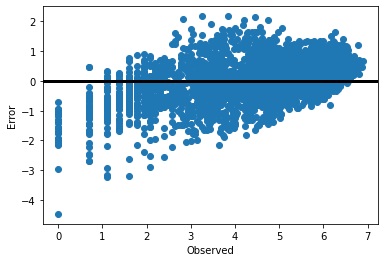

In [56]:
# plot the error difference
error = y_test - y_pred_linear
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [38]:
from sklearn.metrics import r2_score,mean_squared_error

In [60]:
r2_linear= r2_score(y_test,y_pred_linear)

In [61]:
mse = metrics.mean_squared_error(y_test,y_pred_linear)


<IPython.core.display.Javascript object>

In [62]:
print('r2_score is ',r2_linear)
print('MSE is ',mse)

r2_score is  0.7920936077187022
MSE is  0.4497297479112585


### Ridge Regularization

In [72]:
model_ridge = Ridge(alpha=0.001,max_iter=5)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

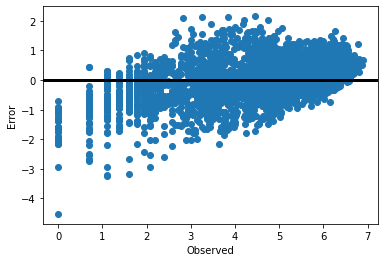

In [73]:
error = y_test - y_pred_ridge
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [74]:
r2_ridge = r2_score(y_test,y_pred_ridge)
mse_ridge = metrics.mean_squared_error(y_test,y_pred_ridge)


<IPython.core.display.Javascript object>

In [75]:
print('r2_score is ',r2_ridge)
print('MSE is ',mse_ridge)

r2_score is  0.7923485368545625
MSE is  0.4491783015860748


### Lasso Regularization

In [76]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

<IPython.core.display.Javascript object>

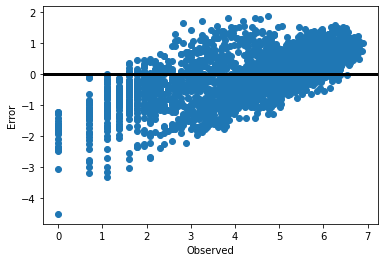

In [77]:
error = y_test - y_pred_lasso
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [78]:
r2_lasso= r2_score(y_test,y_pred_ridge)
mse_lasso= metrics.mean_squared_error(y_test,y_pred_lasso)


<IPython.core.display.Javascript object>

In [79]:
print('r2_score is ',r2_lasso)
print('MSE is ',mse_lasso)

r2_score is  0.7923485368545625
MSE is  0.545516398623729


## DecisionTreeRegressor creating

In [81]:
decision_tree= DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
decision_tree_pred= ridge.predict(X_test)

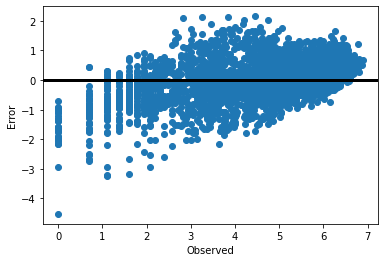

In [82]:
error = y_test - decision_tree_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [84]:
r2_decision= r2_score(y_test,decision_tree_pred)
mse_des= metrics.mean_squared_error(y_test,decision_tree_pred)


<IPython.core.display.Javascript object>

In [85]:
print('r2_score is ',r2_decision)
print('MSE is ',mse_des)

r2_score is  0.7923496966983464
MSE is  0.449175792686532


### RandomForestRegressor creating

In [86]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

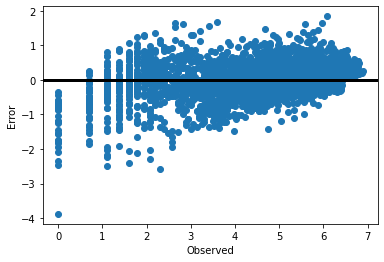

In [87]:
error = y_test - rf_pred 
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [96]:
r2_rf= r2_score(y_test,rf_pred)
mse_rf= metrics.mean_squared_error(y_test,rf_pred)


<IPython.core.display.Javascript object>

In [97]:
print('r2_score is ',r2_rf)
print('MSE is ',mse_rf)

r2_score is  0.8911779289174021
MSE is  0.2353969113606721


### ExtraTreesRegressor creating

In [98]:
et_model = ExtraTreesRegressor()
et_model.fit(X_train,y_train)
et_pred = rf_model.predict(X_test)

In [99]:
r2_et= r2_score(y_test,et_pred)
mse_et= metrics.mean_squared_error(y_test,et_pred)


<IPython.core.display.Javascript object>

In [100]:
print('r2_score is ',r2_et)
print('MSE is ',mse_et)

r2_score is  0.8911779289174021
MSE is  0.2353969113606721


### HuberRegressor creating  model

In [102]:
hr= HuberRegressor()
hr.fit(X_train, y_train)
hr_pred = hr.predict(X_test)

In [103]:
r2_hr= r2_score(y_test,hr_pred)
mse_hr= metrics.mean_squared_error(y_test,hr_pred)


<IPython.core.display.Javascript object>

In [104]:
print('r2_score is ',r2_hr)
print('MSE is ',mse_hr)

r2_score is  0.7827871695444529
MSE is  0.469860836946722


###  ElasticNetCV creating

In [105]:
enc= ElasticNetCV()
enc.fit(X_train, y_train)
enc_pred = hr.predict(X_test)

In [106]:
r2_enc= r2_score(y_test,enc_pred)
enc_mse= metrics.mean_squared_error(y_test,enc_pred)


<IPython.core.display.Javascript object>

In [107]:
print('r2_score is ',r2_enc)
print('MSE is ',enc_mse)

r2_score is  0.7827871695444529
MSE is  0.469860836946722


### GradientBoostingRegressor creting

In [108]:
gbt= GradientBoostingRegressor()
gbt.fit(X_train, y_train)
gbt_pred = gbt.predict(X_test)

In [109]:
r2_gbt= r2_score(y_test,gbt_pred)
gbt_mse= metrics.mean_squared_error(y_test,gbt_pred)

<IPython.core.display.Javascript object>

In [110]:
print('r2_score is ',r2_gbt)
print('MSE is ',gbt_mse)

r2_score is  0.840666919483556
MSE is  0.3446590811774213


## Conclussion

##### the randomforest model will  be performed well in this project

In [111]:
#### sasve the model as rf_model

In [112]:
import pickle

In [113]:
# open a file, where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_model, file)